In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
dataset = ['0.049_sample.csv','0.099_sample.csv', '0.125_sample.csv']
threshold = ['fixed', 'Cross entropy diff', 'Randomly selected anomaly min', 
             'Randomly selected anomaly average', 'Randomly selected anomaly median','Randomly selected anomaly max']

diff_loss_thr  = '../result/0.049_sample.csv_cross_entropy_loss_list.json'
random_selected_loss_thr = '../result/0.049_sample.csv_cross_entropy_loss_result.json'


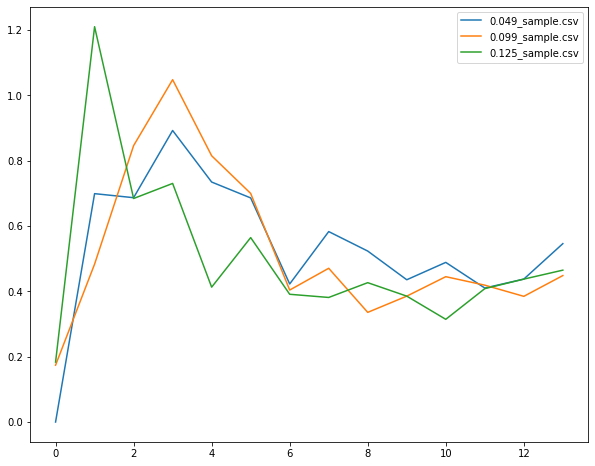

In [16]:
# Cross entropy loss delta as Threshold #
# Comparison by event logs (Anomalous events proportion)

result = {}

fig, ax = plt.subplots(figsize=(10,8))
for i in dataset:
    diff_loss_thr  = '../result/%s_cross_entropy_loss_list.json'%(i)
    with open(diff_loss_thr, 'r') as f:
        result[i] = json.load(f)
    ax.plot(result[i].values(), label = i)
ax.legend()

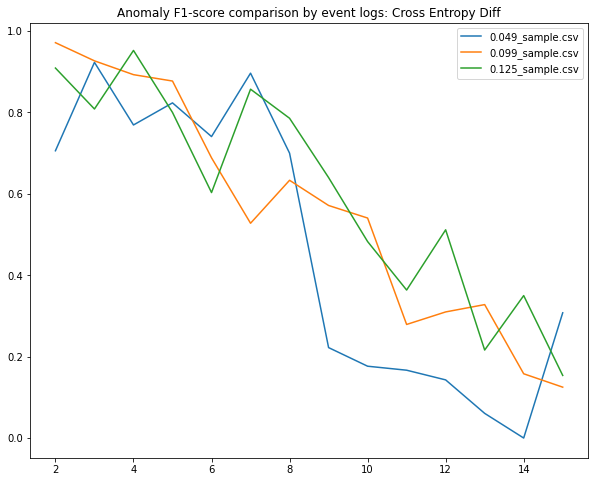

In [25]:
# Cross entropy loss delta as Threshold #
# Anomaly F1-score Comparison by event logs (Anomalous events proportion)

fig, ax = plt.subplots(figsize = (10,8))
for i in dataset:
    cross_entropy_diff_result = '../result/%s_cross_entropy_diff_anomal_thr_result.csv'%(i)
    df = pd.read_csv(cross_entropy_diff_result)
    prefix = list(df['Prefix length'])
    ax.plot(prefix, df['Anomal f1-score'], label = i)

ax.set_title('Anomaly F1-score comparison by event logs: Cross Entropy Diff')
ax.legend()
plt.show()

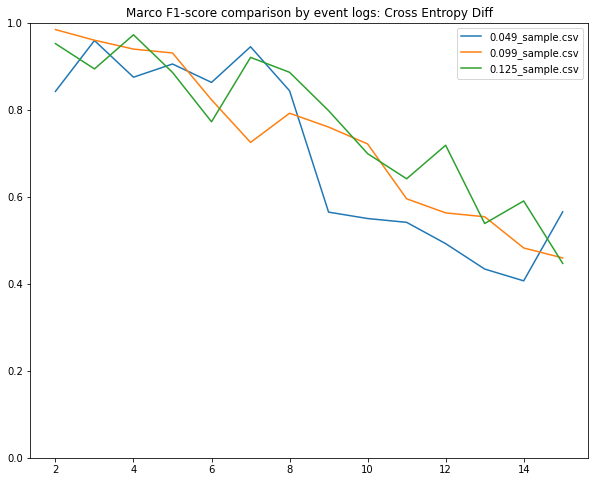

In [28]:
# Cross entropy loss delta as Threshold #
# Macro F1-score Comparison by event logs (Anomalous events proportion)

fig, ax = plt.subplots(figsize = (10,8))
for i in dataset:
    cross_entropy_diff_result = '../result/%s_cross_entropy_diff_anomal_thr_result.csv'%(i)
    df = pd.read_csv(cross_entropy_diff_result)
    prefix = list(df['Prefix length'])
    ax.plot(prefix, df['Macro f1-score'], label = i)

ax.set_ylim(0,1)
ax.set_title('Marco F1-score comparison by event logs: Cross Entropy Diff')
ax.legend()
plt.show()


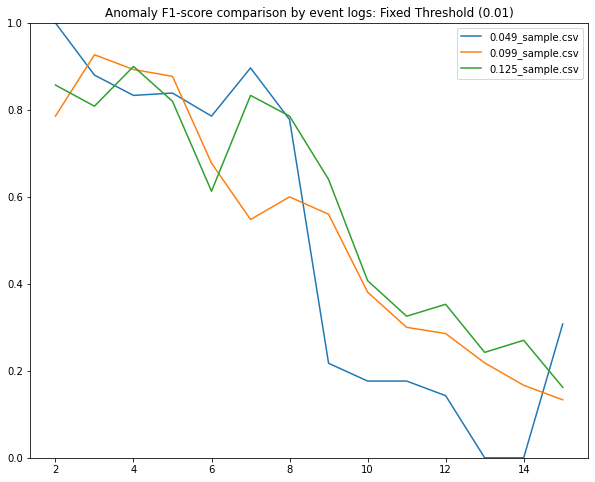

In [42]:
# Fixed value as Threshold, 0.01 #
# Anomaly F1-score Comparison by event logs (Anomalous events proportion)

fig, ax = plt.subplots(figsize = (10,8))
for i in dataset:
    cross_entropy_fixed_result = '../result/%s_cross_entropy_fixed_anomal_thr_result.csv'%(i)
    df = pd.read_csv(cross_entropy_fixed_result)
    prefix = list(df['Prefix length'])
    ax.plot(prefix, df['Anomal f1-score'], label = i)

ax.set_ylim(0,1)
ax.set_title('Anomaly F1-score comparison by event logs: Fixed Threshold (0.01)')
ax.legend()
plt.show()


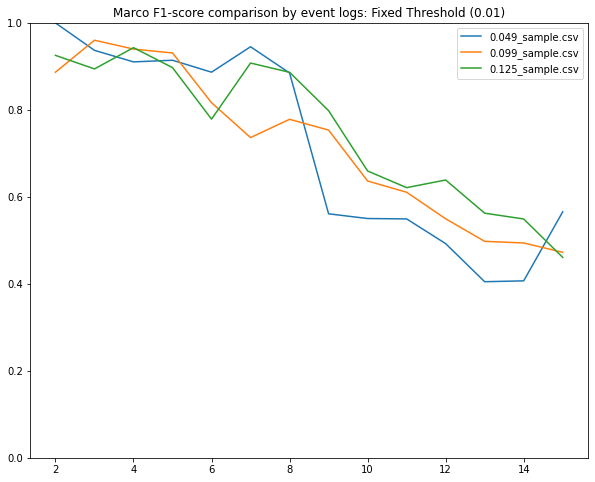

In [44]:
# Fixed value as Threshold, 0.01 #
# Anomaly F1-score Comparison by event logs (Anomalous events proportion)

fig, ax = plt.subplots(figsize = (10,8))

for i in dataset:
    cross_entropy_fixed_result = '../result/%s_cross_entropy_fixed_anomal_thr_result.csv'%(i)
    df = pd.read_csv(cross_entropy_fixed_result)
    prefix = list(df['Prefix length'])
    ax.plot(prefix, df['Macro f1-score'], label = i)

ax.set_ylim(0,1)
ax.set_title('Marco F1-score comparison by event logs: Fixed Threshold (0.01)')
ax.legend()
plt.show()


0.049_sample.csv
min 0.411
avg 0.376
median 0.115
max 0.022


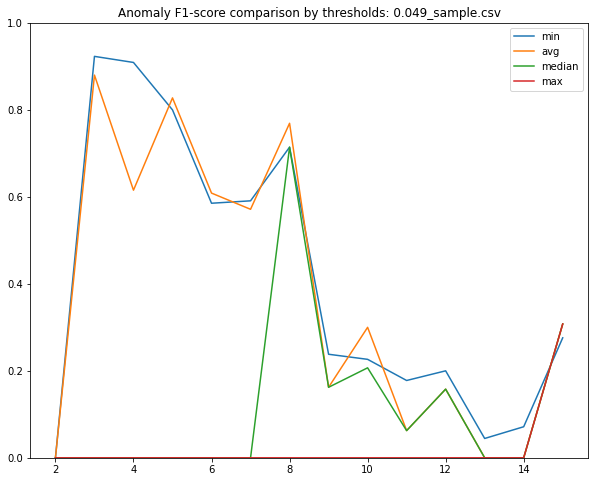

0.099_sample.csv
min 0.435
avg 0.412
median 0.264
max 0.0


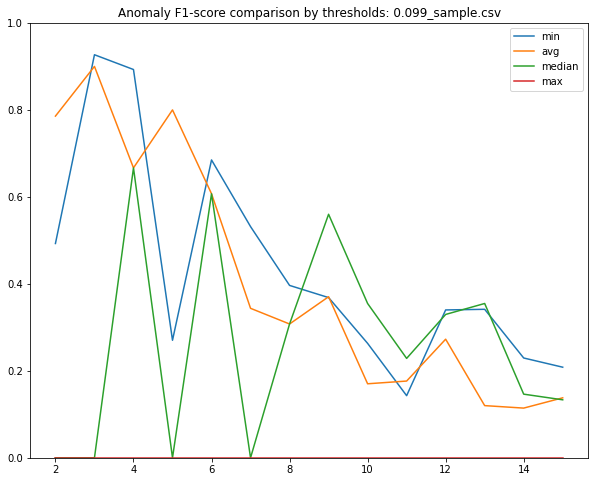

0.125_sample.csv
min 0.473
avg 0.316
median 0.381
max 0.0


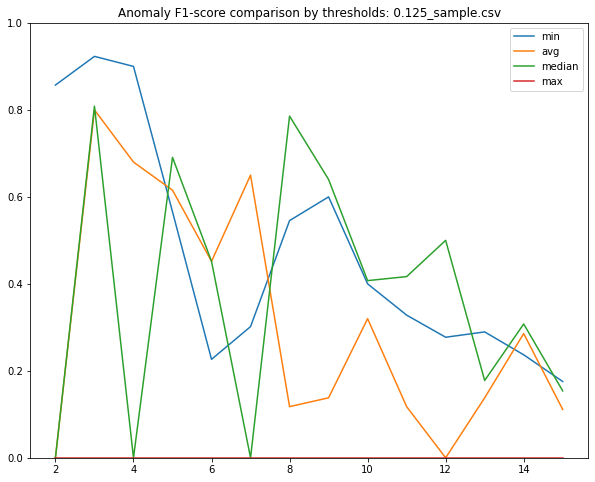

In [52]:
# Random anomaly is known. Set threshold from based on the cross entropy loss of known Anomalies#
# Anomaly F1-score Comparison by event logs (Anomalous events proportion)


for i in dataset:
    fig, ax = plt.subplots(figsize = (10,8))
    print(i)
    for method in ['min', 'avg', 'median', 'max']:
        cross_entropy_fixed_result = '../result/%s_cross_entropy_%s_anomal_thr_result.csv'%(i, method)
        df = pd.read_csv(cross_entropy_fixed_result)
        prefix = list(df['Prefix length'])
        ax.plot(prefix, df['Anomal f1-score'], label = method)
        print(method, round(np.average(df['Anomal f1-score']),3))
    ax.set_ylim(0,1)
    ax.set_title('Anomaly F1-score comparison by thresholds: %s'%(i))
    ax.legend()
    plt.show()


0.049_sample.csv
min 0.651
avg 0.653
median 0.531
max 0.494


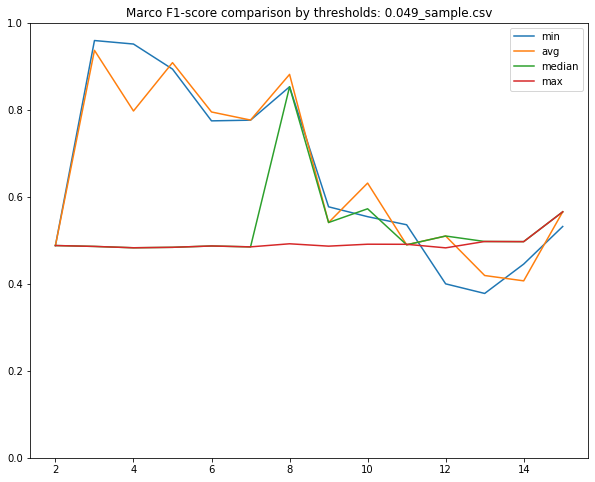

0.099_sample.csv
min 0.586
avg 0.662
median 0.582
max 0.475


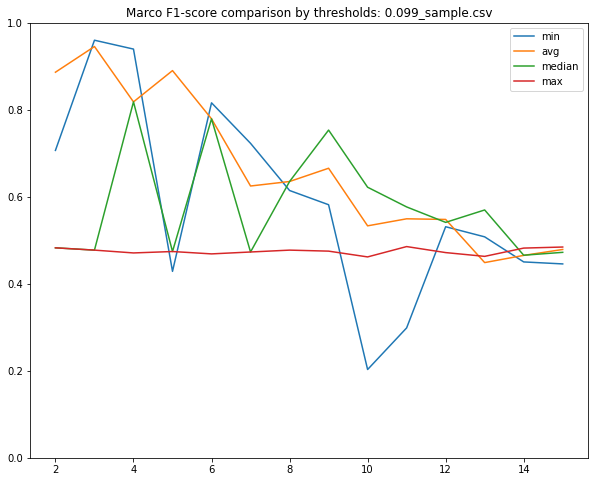

0.125_sample.csv
min 0.618
avg 0.621
median 0.649
max 0.474


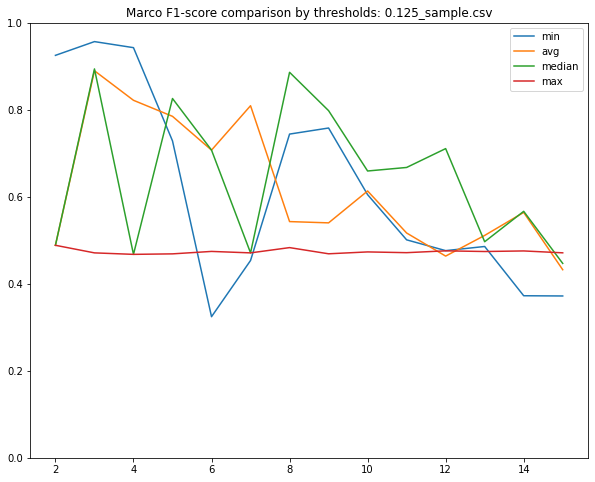

In [53]:
# Random anomaly is known. Set threshold from based on the cross entropy loss of known Anomalies#
# Macro F1-score Comparison by event logs (Anomalous events proportion)


for i in dataset:
    fig, ax = plt.subplots(figsize = (10,8))
    print(i)

    for method in ['min', 'avg', 'median', 'max']:
        cross_entropy_fixed_result = '../result/%s_cross_entropy_%s_anomal_thr_result.csv'%(i, method)
        df = pd.read_csv(cross_entropy_fixed_result)
        prefix = list(df['Prefix length'])
        ax.plot(prefix, df['Macro f1-score'], label = method)
        print(method, round(np.average(df['Macro f1-score']),3))

    ax.set_ylim(0,1)
    ax.set_title('Marco F1-score comparison by thresholds: %s'%(i))
    ax.legend()
    plt.show()


0.049_sample.csv
fixed 0.502
diff 0.474
min 0.411


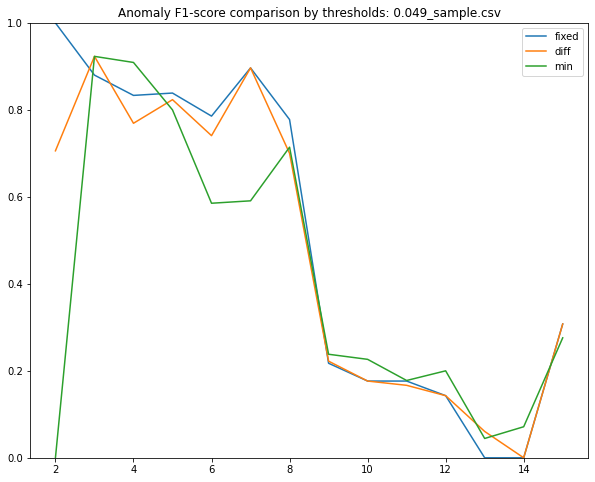

0.099_sample.csv
fixed 0.525
diff 0.559
min 0.435


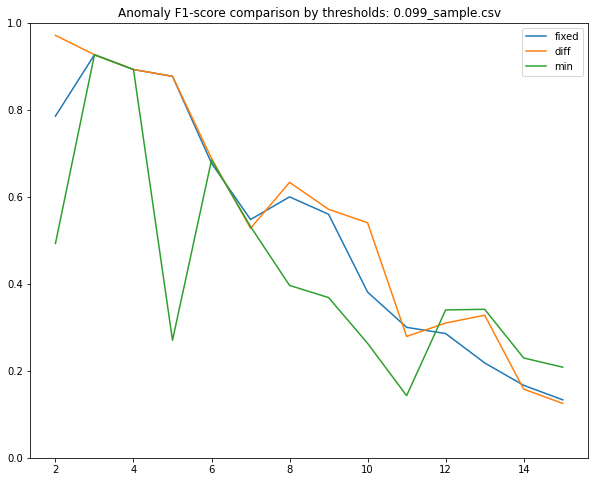

0.125_sample.csv
fixed 0.573
diff 0.602
min 0.473


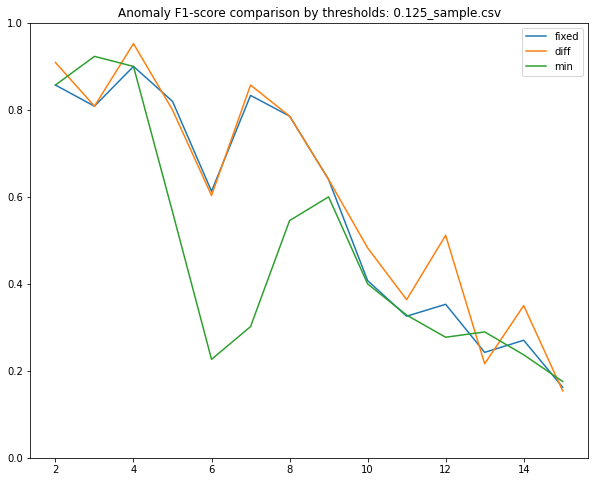

In [55]:
# Compare three threshold setting, 1) Fixed (0.01), 2) Diff-based adaptive, 3) Mins loss of known anomaly#
# Anomaly F1-score Comparison by event logs (Anomalous events proportion)


for i in dataset:
    fig, ax = plt.subplots(figsize = (10,8))
    print(i)

    for method in ['fixed','diff','min']:
        cross_entropy_fixed_result = '../result/%s_cross_entropy_%s_anomal_thr_result.csv'%(i, method)
        df = pd.read_csv(cross_entropy_fixed_result)
        prefix = list(df['Prefix length'])
        ax.plot(prefix, df['Anomal f1-score'], label = method)
        print(method, round(np.average(df['Anomal f1-score']),3))

    ax.set_ylim(0,1)
    ax.set_title('Anomaly F1-score comparison by thresholds: %s'%(i))
    ax.legend()
    plt.show()


0.049_sample.csv
fixed 0.715
diff 0.699
min 0.651


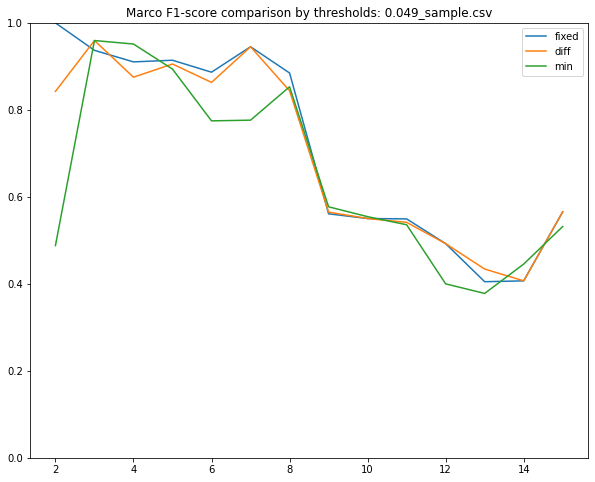

0.099_sample.csv
fixed 0.719
diff 0.735
min 0.586


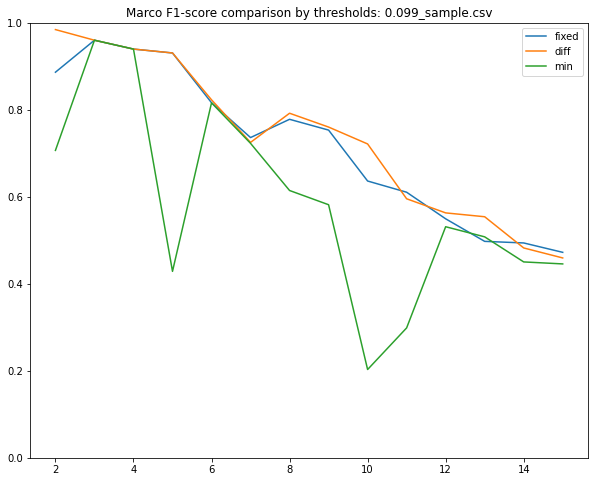

0.125_sample.csv
fixed 0.752
diff 0.766
min 0.618


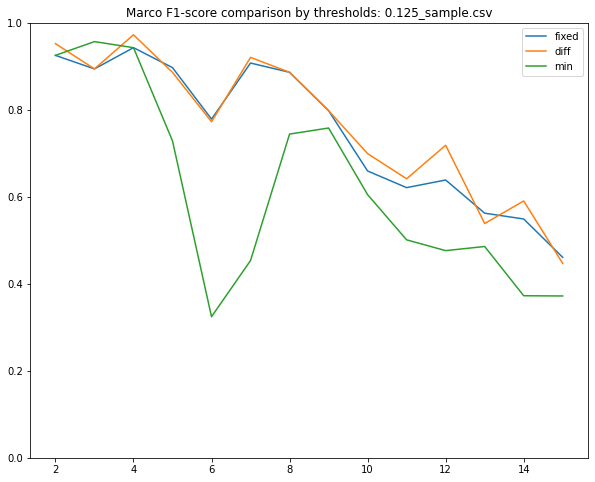

In [56]:
# Compare three threshold setting, 1) Fixed (0.01), 2) Diff-based adaptive, 3) Mins loss of known anomaly#
# Macro F1-score Comparison by event logs (Anomalous events proportion)


for i in dataset:
    fig, ax = plt.subplots(figsize = (10,8))
    print(i)

    for method in ['fixed','diff','min']:
        cross_entropy_fixed_result = '../result/%s_cross_entropy_%s_anomal_thr_result.csv'%(i, method)
        df = pd.read_csv(cross_entropy_fixed_result)
        prefix = list(df['Prefix length'])
        ax.plot(prefix, df['Macro f1-score'], label = method)
        print(method, round(np.average(df['Macro f1-score']),3))

    ax.set_ylim(0,1)
    ax.set_title('Marco F1-score comparison by thresholds: %s'%(i))
    ax.legend()
    plt.show()

## Gradual K-folding update

In [3]:
dataset

['0.049_sample.csv', '0.099_sample.csv', '0.125_sample.csv']

In [17]:
# Cross entropy loss delta as Threshold #
# Anomaly F1-score Comparison by event logs (Anomalous events proportion)
d1 = '0.049_sample.csv'
folds = range(1,5)

dft = pd.DataFrame(columns = [])
for i in folds:
    cross_entropy_diff_result = '../result/%s_cross_entropy_%sfold_fixed_anomal_thr_result.csv'%(d1, i)
    df = pd.read_csv(cross_entropy_diff_result)
    prefix = list(df['Prefix length'])
    dft['Prefix length'] = prefix
    result_from_folding = '%sf Anomaly precision'%(i)
    dft[result_from_folding] = list(df['Anomal precision'])

In [18]:
df.plot(x=prefix,
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')


# x = prefix  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/len(folds), men_means, width, label='Men')
# rects2 = ax.bar(x + width/len(folds), women_means, width, label='Women')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

KeyError: 'Team'

0.4748483763521358
0.7259785965668318
0.7489385147998594


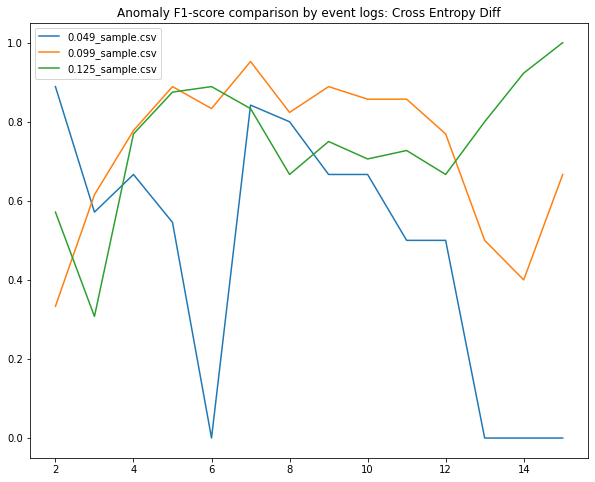

In [29]:
# Cross entropy loss delta as Threshold #
# Anomaly F1-score Comparison by event logs (Anomalous events proportion)

fig, ax = plt.subplots(figsize = (10,8))
for i in dataset:
    cross_entropy_diff_result = '../result/%s_cross_entropy_4fold_diff_anomal_thr_result.csv'%(i)
    df = pd.read_csv(cross_entropy_diff_result)
    prefix = list(df['Prefix length'])
    ax.plot(prefix, df['Anomal f1-score'], label = i)
    print(np.average(df['Anomal f1-score']))

ax.set_title('Anomaly F1-score comparison by event logs: Cross Entropy Diff')
ax.legend()
plt.show()